# Prepare robots first  
* run panda repeater on controller pc  

```
ssh panda@192.168.0.172
roslaunch panda_ros_repeater joint_velocity_repeater.launch robot_ip:=192.168.0.13 load_gripper:=false

```

* Keep indy connected to conty to bypass conty-connection delay bug

# initialize notebook

In [1]:
from __future__ import print_function
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; } </style>"))
import matplotlib.pyplot as plt

# Initialize constants

In [2]:
from pkg.marker_config import *
from pkg.tmp_framework import *
from pkg.constraint.constraint_action import *
from pkg.constraint.constraint_object import *
from pkg.constants import *
from pkg.utils.plot_utils import *
from pkg.utils.utils import *
from pkg.environment_builder import *
from pkg.ui.ui_broker import *
from pkg.controller.combined_robot import *

gtimer = GlobalTimer.instance()
gtimer.reset()

In [3]:
crob = CombinedRobot(connection_list=(False, False))
USE_CAM = True

connection_list
(False, False)


# initialize graph & ui

In [4]:
if "cam" not in locals():
    cam = StereoCamera.instance() if USE_CAM else None

# set urdf
xcustom, JOINT_NAMES, LINK_NAMES, urdf_content = set_custom_robots(crob.robots_on_scene, XYZ_RPY_ROBOTS_DEFAULT, crob.custom_limits, start_rviz=True)
ghnd = GeometryHandle(urdf_content)


graph = TMPFramework(ghnd=ghnd, urdf_path=URDF_PATH, joint_names=JOINT_NAMES, link_names=LINK_NAMES, 
                        urdf_content=urdf_content, combined_robot=crob)
graph.set_camera(cam)
graph.set_cam_robot_collision(_add_cam_poles=False, color=(1,1,1,0))
graph.set_rviz()

# start UI
ui_broker = UIBroker.instance()
ui_broker.initialize(graph)
ui_broker.start_server()

# set rviz
graph.set_rviz(crob.home_pose)
ui_broker.set_tables()

Start streaming
Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.


Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


Please create a subscriber to the marker
publication OK
published: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Please create a subscriber to the marker
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "pkg.ui.dash_launcher" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


# Calibrate camera

In [5]:
if USE_CAM:
    cam.calibrate(ghnd)
    graph.set_cam_robot_collision()
    graph.set_rviz()

# Update Robots

In [6]:
if USE_CAM:
    # btn: detect robots
    crob.detect_robots(cam)

    # btn: apply
    xcustom, JOINT_NAMES, LINK_NAMES, urdf_content = set_custom_robots(crob.robots_on_scene, crob.xyz_rpy_robots, crob.custom_limits, start_rviz=True)
    ghnd = GeometryHandle(urdf_content)


    graph.clear_markers()
    graph.clear_highlight()
    graph.ghnd.clear()
    timer.sleep(1)
    graph.__init__(ghnd=ghnd, urdf_path=URDF_PATH, joint_names=JOINT_NAMES, link_names=LINK_NAMES, 
                       urdf_content=urdf_content, combined_robot=crob)
    add_geometry_items(graph.urdf_content, ghnd, color=(0, 1, 0, 0.3), display=True, collision=True,
                       exclude_link=["panda1_link7"])
    graph.set_cam_robot_collision()
    graph.set_rviz()

Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


# Detect environment

In [7]:
env_gen_dict, objectPose_dict, corner_dict, color_image, rs_objectPose_dict, rs_corner_dict, rs_image = cam.detect_environment(ghnd)
add_objects_gen(graph, env_gen_dict)
graph.set_rviz()

## Register binders

In [8]:
graph.register_binder(name='grip1', _type=Gripper2Tool, point=[0,0,0.112], rpy=[-np.pi/2,0,0], link_name="panda1_hand")
graph.register_binder(name='grip0', _type=Gripper2Tool, point=[0,0,0.14], rpy=[-np.pi/2,0,0], link_name="indy0_tcp")
graph.register_binder(name='floor', _type=PlacePlane)

## detect movable

In [9]:
BINDER_DICT = {'goal_bd': dict(_type=PlacePlane, object_name="goal", point=[0,0,0.02], rpy=[0,0,0])}
OBJECT_DICT = {'box1': dict(_type=BoxAction, hexahedral=True),
               'box2': dict(_type=BoxAction, hexahedral=True)}

In [10]:
objectPose_dict_mv, corner_dict_mv, color_image, aruco_map_mv = detect_objects(graph.cam.aruco_map, graph.cam.dictionary, graph.cam.ref_tuple)
put_point_dict = graph.register_object_gen(objectPose_dict_mv, BINDER_DICT, OBJECT_DICT, link_name="base_link")
graph.set_rviz()

In [11]:
door = ghnd.NAME_DICT["door"]

In [12]:
T_door = door.Toff
T_knob = np.matmul(T_door, SE3(Rot_rpy((-np.pi/2, 0, -np.pi/2)).transpose(), (0.161,0,0.030)))
knob = ghnd.create_safe(
    name="knob", link_name="base_link", gtype=GEOTYPE.CYLINDER,
    center=tuple(T_knob[:3,3]), rpy=Rot2rpy(T_knob[:3,:3]), dims=(0.008,0.008,0.16),
    color=(0.8, 0.8, 0.8, 1), display=True, collision=True, fixed=True)
graph.add_marker(knob)

In [13]:
T_hinge = np.matmul(T_door, SE3(Rot_rpy((-np.pi/2, 0, -np.pi/2)).transpose(), (-door.dims[0]/2, 0, 0)))
hinge = ghnd.create_safe(
    name="hinge", link_name="base_link", gtype=GEOTYPE.CYLINDER,
    center=tuple(T_hinge[:3,3]), rpy=Rot2rpy(T_hinge[:3,:3]), dims=(0.01,0.01,door.dims[1]),
    color=(0.8, 0.8, 0.8, 1), display=True, collision=True, fixed=True)
graph.add_marker(hinge)

In [14]:
# graph.remove_geometry(hinge)
# graph.remove_geometry(knob)

In [15]:
graph.show_pose(graph.get_real_robot_pose())

In [16]:
from pkg.planner.moveit import moveit_py
from pkg.planner.moveit.moveit_planner import MoveitPlanner

### Set Planner

In [17]:
mplan = MoveitPlanner(
    joint_names=graph.joint_names, link_names=graph.link_names, urdf_path=graph.urdf_path, urdf_content=graph.urdf_content, 
    robot_names=crob.robot_names, ghnd=ghnd)
graph.set_planner(mplan)

### define constants

In [18]:
graph.clear_highlight()
# graph.remove_geometry(tool_point)

In [19]:
TOOL_XYZRPY = ((0,-0.025,0.125),(np.pi,np.pi/2,0))
TOOL_TF = T_xyzrpy(TOOL_XYZRPY)
TOOL_XYZQUAT = T2xyzquat(TOOL_TF)

tool_point = ghnd.create_safe(gtype=GEOTYPE.SPHERE, name="tool", link_name="indy0_tcp",
                                      center=TOOL_XYZRPY[0], rpy=TOOL_XYZRPY[1], 
                                      dims=(0.02,0.02,0.02), color=(1, 0, 0, 0.7),
                                      collision=False)
graph.add_marker(tool_point)
graph.add_highlight_axis(hl_key="HL", name="tool_ax", link_name="indy0_tcp", center=tool_point.center, orientation_mat=tool_point.orientation_mat)
graph.add_highlight_axis(hl_key="HL", name="hinge_ax", link_name="base_link", center=hinge.center, orientation_mat=hinge.orientation_mat)
graph.add_highlight_axis(hl_key="HL", name="knob_ax", link_name="base_link", center=knob.center, orientation_mat=knob.orientation_mat)
RADII = np.linalg.norm(np.subtract(knob.center, hinge.center))
GROUP_NAME, TOOL_LINK, BASE_LINK  = "indy0", "indy0_tcp", "base_link"

# Track plane Test

In [20]:
mplan.update(graph)

### check starting pose

In [21]:
Q_init = crob.home_pose
Tgrib = np.matmul(knob.Toff, SE3_inv(TOOL_TF))
start_pose = T2xyzquat(Tgrib)
trajectory_s, success = mplan.planner.plan_py(robot_name=GROUP_NAME, tool_link=TOOL_LINK, goal_pose=start_pose[0]+start_pose[1], goal_link=BASE_LINK, 
                                            Q_init=Q_init, plannerconfig="RRTConnectkConfigDefault", timeout=60)
Q_ready = trajectory_s[-1]
print("start_pose: {}".format(start_pose))
print("Q_ready: {}".format(np.round(Q_ready,2)))

start_pose: ([-0.13899284601211548, -0.1588086187839508, 0.1792275309562683], [0.708940775352747, 0.7052527140228428, 0.0026313849154587787, -0.0038291277187977517])
Q_ready: [ 1.04 -0.66 -1.74  0.   -0.74  1.04  0.   -0.39  0.   -1.57  0.    1.57
  1.57]


In [22]:
graph.show_motion(trajectory_s)
graph.show_pose(trajectory_s[-1])

### check goal pose

In [23]:
Tup = np.matmul(SE3(np.identity(3), (0,0,RADII)), hinge.Toff)
goal_pose = T2xyzquat(np.matmul(Tup, SE3_inv(TOOL_TF))) # after meet
trajectory, success = mplan.planner.plan_py(robot_name=GROUP_NAME, tool_link=TOOL_LINK, goal_pose=goal_pose[0]+goal_pose[1], goal_link=BASE_LINK, 
                                            Q_init=Q_ready, plannerconfig="RRTConnectkConfigDefault", timeout=1)
Q_last_ex = trajectory[-1]
print("Q_last_ex: {}".format(Q_last_ex))
print("goal_pose: {}".format(goal_pose))

Q_last_ex: [ 4.78414107e-01 -5.59204278e-02 -1.63242356e+00  5.16219139e-04
 -1.45320513e+00  4.83996688e-01  0.00000000e+00 -3.92699082e-01
  0.00000000e+00 -1.57079633e+00  0.00000000e+00  1.57079633e+00
  1.57079633e+00]
goal_pose: ([-0.4800378382205963, -0.15675850212574005, 0.49213171005249023], [0.708940775352747, 0.7052527140228428, 0.0026313849154587787, -0.0038291277187977517])


In [24]:
graph.show_motion(trajectory)
graph.show_pose(trajectory[-1])

### set manifolds

In [25]:
knob_cyl = ghnd.create_safe(
        name="knob_cyl", link_name="base_link", gtype=GEOTYPE.CYLINDER,
        center=hinge.center, rpy=hinge.rpy, dims=(RADII*2, RADII*2, 0.01),
        color=(0, 0, 1, 0.3), display=True, collision=False, fixed=True)
knob_plane = ghnd.create_safe(
        name="knob_plane", link_name="base_link", gtype=GEOTYPE.BOX,
        center=hinge.center, rpy=hinge.rpy, dims=(RADII*2, RADII*2, 0.01),
        color=(0, 0, 1, 0.3), display=True, collision=False, fixed=True)
graph.add_marker(knob_cyl)
# graph.add_marker(knob_plane)

In [26]:
# graph.remove_geometry(knob_cyl)
# graph.remove_geometry(knob_plane)

In [27]:
mplan.update(graph)
mplan.planner.clear_context_cache()
mplan.planner.clear_manifolds()

True

In [28]:
keep_radi = make_constraint_list([knob_cyl])
mplan.planner.add_union_manifold_py(group_name=GROUP_NAME, tool_link=TOOL_LINK, tool_offset=TOOL_XYZQUAT[0]+TOOL_XYZQUAT[1], 
                                    geometry_list=keep_radi, fix_surface=True, fix_normal=False, tol=1e-3)

In [29]:
keep_plane = make_constraint_list([knob_plane])
mplan.planner.add_union_manifold_py(group_name=GROUP_NAME, tool_link=TOOL_LINK, tool_offset=TOOL_XYZQUAT[0]+TOOL_XYZQUAT[1], 
                                    geometry_list=keep_plane, fix_surface=True, fix_normal=False, tol=2e-3)

In [30]:
plane_vert = make_constraint_list([knob_plane])
mplan.planner.add_union_manifold_py(group_name=GROUP_NAME, tool_link=TOOL_LINK, tool_offset=TOOL_XYZQUAT[0]+TOOL_XYZQUAT[1], 
                                    geometry_list=plane_vert, fix_surface=False, fix_normal=True, tol=3e-3)

### search plan

In [31]:
for _ in range(10):
    trajectory_rough, success = mplan.planner.plan_constrained_py(GROUP_NAME,TOOL_LINK, goal_pose[0]+goal_pose[1], BASE_LINK, Q_ready, timeout=10)
    if success:
        break
print('result: {} ({})'.format(success, len(trajectory_rough)))

result: True (63)


In [32]:
graph.show_motion(trajectory_rough, period=0.01)

In [33]:
trajectory_s, trajectory_vel = apply_vel_acc_lims(trajectory_s, DT=1/4e3, urdf_content=urdf_content, joint_names = graph.joint_names, vel_scale=0.4, acc_scale=0.002)
trajectory, trajectory_vel = apply_vel_acc_lims(trajectory_rough, DT=1/4e3, urdf_content=urdf_content, joint_names = graph.joint_names, vel_scale=0.2, acc_scale=0.005)

In [34]:
graph.show_pose(trajectory_s[0])

In [35]:
gtimer.tic("start")
graph.show_motion(trajectory_s[::320], period=0.02)
gtimer.toc("start")
time.sleep(1)
gtimer.tic("test")
graph.show_motion(trajectory[::160], period=0.02)
gtimer.toc("test")

7081.044912338257

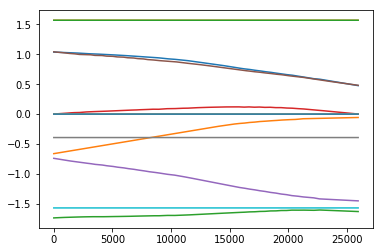

In [36]:
plt.plot(trajectory)

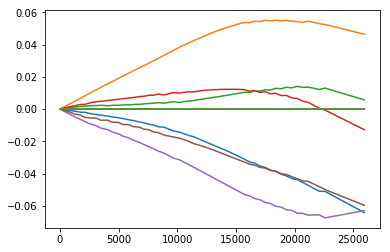

In [37]:
plt.plot(trajectory_vel)

## Execute motion

In [38]:
# prepare indy
indy = indytraj_client(server_ip="192.168.0.63", robot_name="NRMK-Indy7")

In [47]:
trajectory_indy = trajectory[:,:6]
trajectory_indy_s = trajectory_s[:,:6]

indy.connect_and(indy.go_home)
indy.connect_and(indy.wait_for_move_finish)

Connect: Server IP (192.168.0.63)
Connect: Server IP (192.168.0.63)
Move finished!


True

In [48]:
indy.connect_and(indy.grasp, False)

Connect: Server IP (192.168.0.63)


In [49]:
indy.connect_and(indy.joint_move_to, np.rad2deg(trajectory_indy_s[0]))
indy.connect_and(indy.wait_for_move_finish)

Connect: Server IP (192.168.0.63)
Connect: Server IP (192.168.0.63)
Move finished!


True

In [50]:
# Options
traj_type = 1  # 1 for joint move, 2 for task move
traj_freq = 4000  # control rate
dat_size = 6  # DOF

# make_trajectory
trajectory_d_s = differentiate(trajectory_indy_s, 1./traj_freq)
trajectory_dd_s = differentiate(trajectory_indy_s, 1./traj_freq)
traj_data_s = np.concatenate([trajectory_indy_s, trajectory_d_s, trajectory_dd_s], axis=-1).flatten()
indy.connect_and(indy.move_ext_traj_txt, traj_type, traj_freq, dat_size, traj_data_s)

Connect: Server IP (192.168.0.63)


In [51]:
indy.connect_and(indy.joint_move_to, np.rad2deg(trajectory_indy[0]))
indy.connect_and(indy.wait_for_move_finish)

Connect: Server IP (192.168.0.63)
Header check fail (cmdId): Request 9, Response 9999
ErrorCode 14: Robot is moving
Connect: Server IP (192.168.0.63)
Move finished!


True

In [52]:
indy.connect_and(indy.grasp, True)

Connect: Server IP (192.168.0.63)


In [53]:
# Options
traj_type = 1  # 1 for joint move, 2 for task move
traj_freq = 4000  # control rate
dat_size = 6  # DOF

# make_trajectory
trajectory_d = differentiate(trajectory_indy, 1./traj_freq)
trajectory_dd = differentiate(trajectory_indy, 1./traj_freq)
traj_data = np.concatenate([trajectory_indy, trajectory_d, trajectory_dd], axis=-1).flatten()
indy.connect_and(indy.move_ext_traj_txt, traj_type, traj_freq, dat_size, traj_data)

Connect: Server IP (192.168.0.63)
list.remove(x): x not in list
generate table - Geometry
generate table - Handle
generate table - Object
generate table - Binder
